**Regression**

    * Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
exp = np.array([4, 7 , 9 , 15 , 11]).reshape(5,1)

salary = np.array([5 , 6 , 10 , 16 , 14]).reshape(5,1)

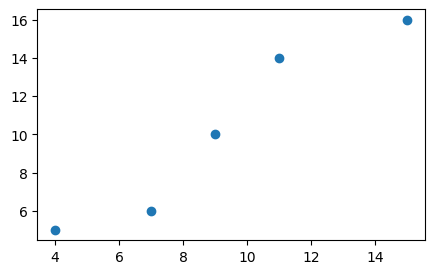

In [4]:
plt.figure(figsize = (5,3))

plt.scatter(exp, salary)
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression

model_A = LinearRegression()

model_A.fit(exp,salary)

LinearRegression()

In [6]:
print(model_A.coef_)
print(model_A.intercept_)

[[1.11627907]]
[-0.06976744]


In [7]:
#Yp = wo + w1 * x

Yp = model_A.intercept_ + model_A.coef_ * exp

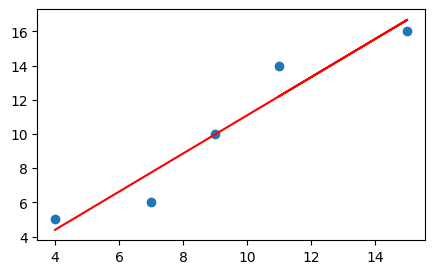

In [8]:
plt.figure(figsize = (5,3))

plt.scatter(exp, salary)

plt.plot(exp , Yp , 'r')

plt.show()

In [9]:
input_exp = 11

#Yp = w0 + w1 * x
salary_predicted = model_A.intercept_ + model_A.coef_ * input_exp

print(salary_predicted)

[[12.20930233]]


**Linear Regression model on Advertisement & Sales data**

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/bipulshahi/Dataset/refs/heads/main/Advertising.csv',
                index_col = 0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [33]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [34]:
!pip install seaborn

You should consider upgrading via the 'C:\Users\vipul\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


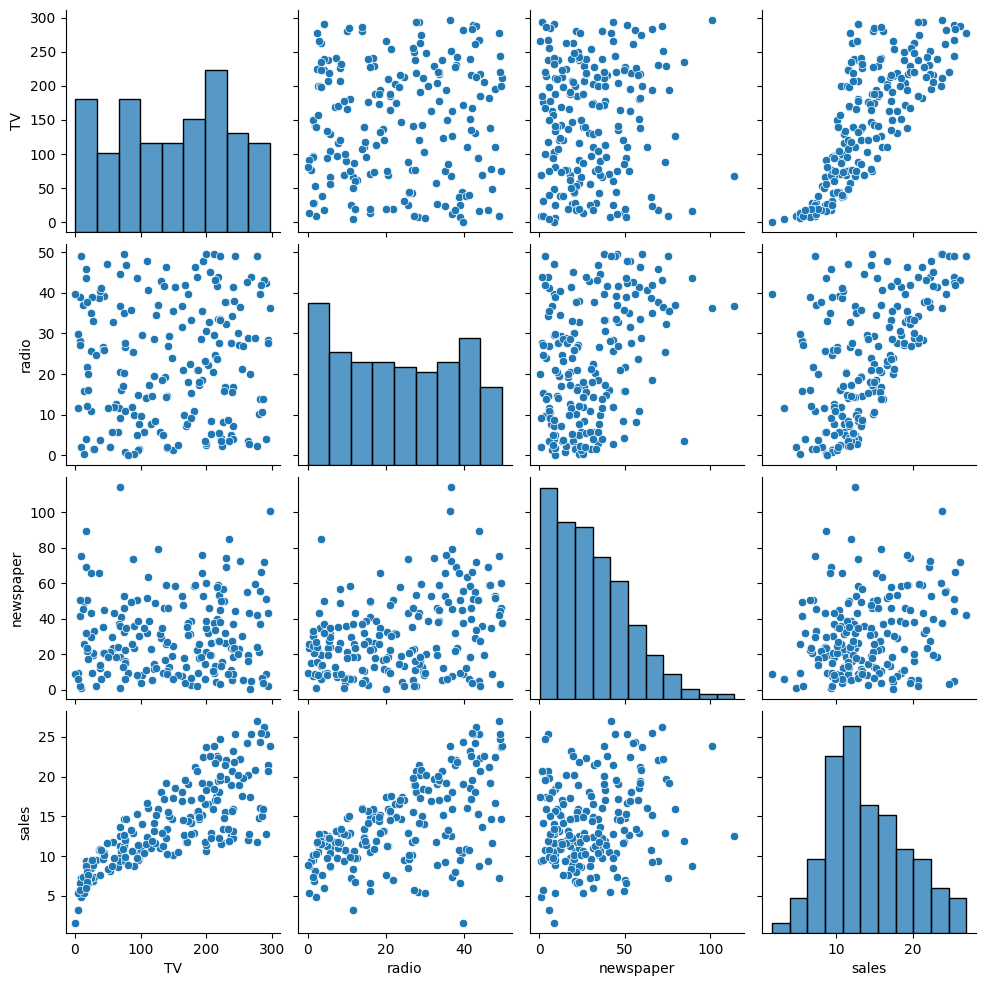

In [35]:
import seaborn as sns

sns.pairplot(df)

**Build a predictive model for sales if TV advertising expenses are known**

**Simple Linear Regression**

    * one feature & one target

In [11]:
X = df[['TV']]
y = df[['sales']]

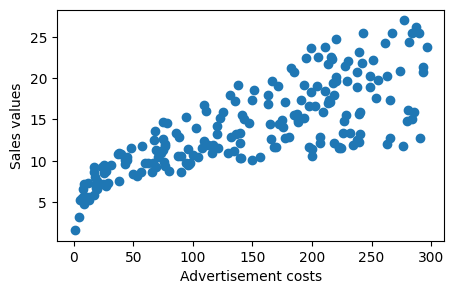

In [12]:
plt.figure(figsize=(5,3))
plt.scatter(X,y)
plt.xlabel('Advertisement costs')
plt.ylabel('Sales values')
plt.show()

In [13]:
#Split the data into two sets = training(75%) & test(25%)
#Use majority of data for training
#Compare model performance on both training & trst data

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.75)

In [14]:
from sklearn.linear_model import LinearRegression

model_B = LinearRegression()

model_B.fit(xtrain,ytrain)

LinearRegression()

In [15]:
print(model_B.coef_)
print(model_B.intercept_)

[[0.04913815]]
[6.90314449]


In [16]:
#Yp = model_B.intercept_ + model_B.coef_ * X

#predict the outout for xtrain
ytrainPred = model_B.predict(xtrain)

#predict the output for xtest
ytestPred = model_B.predict(xtest)

In [17]:
mae_Train = abs(ytrain - ytrainPred).mean()

mae_Test = abs(ytest - ytestPred).mean()

In [18]:
print("Mean Absolute Error - Train Data")
print(mae_Train)
print()
print("Mean Absolute Error - Test Data")
print(mae_Test)

Mean Absolute Error - Train Data
sales    2.570278
dtype: float64

Mean Absolute Error - Test Data
sales    2.470031
dtype: float64


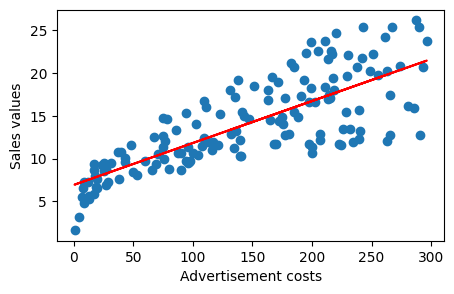

In [20]:
plt.figure(figsize=(5,3))

plt.scatter(xtrain,ytrain)

plt.plot(xtrain,ytrainPred,'r')

plt.xlabel('Advertisement costs')
plt.ylabel('Sales values')
plt.show()

In [21]:
tv_expense = 56.5

#sales_predicted = model_B.intercept_ + model_B.coef_ * tv_expense
sales_predicted = model_B.predict([[tv_expense]])

print(sales_predicted)

[[9.67944972]]


C:\Users\vipul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Multiple Linear Regression**

    * Multiple features

In [36]:
#Use two or more features at a time

X = df[['TV' , 'radio']]
y = df['sales']

In [37]:
#Split into train and test

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.75)

In [38]:
print(X.shape)
print(xtrain.shape)
print(xtest.shape)

(200, 2)
(150, 2)
(50, 2)


In [39]:
#Train the ML model
from sklearn.linear_model import LinearRegression
model_C = LinearRegression()

model_C.fit(xtrain,ytrain)

LinearRegression()

In [40]:
print(model_C.coef_)
print(model_C.intercept_)

[0.04512606 0.1899282 ]
2.8767155870393264


In [41]:
#Calculate error on both training and test data

#make predictions on training data
ytrainPred = model_C.predict(xtrain)

#make predictions on test data
ytestPred = model_C.predict(xtest)

#compare predicted sales on training data with the actual sales value
maeTrain = abs(ytrain - ytrainPred).mean()

#compare predicted sales on test data with the actual sales value
maeTest = abs(ytest - ytestPred).mean()

print("Mean absolute Error on train data" , maeTrain)
print("Mean absolute Error on test data" , maeTest)

Mean absolute Error on train data 1.2844063729770268
Mean absolute Error on test data 1.2397997211857108


In [42]:
#make prediction for value if tv_expense = 56.5 & radio expense = 76.9

print(model_C.predict([[56.5,76.9]]))

[20.03181626]


C:\Users\vipul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**Build, Evaluate and predict sales if we have 3 features for training**

    * TV
    * radio
    * newspaper

In [30]:
X = df[['TV' , 'radio' , 'newspaper']]
y = df['sales']

In [31]:
#Split into train and test

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.75)

#Train the ML model
from sklearn.linear_model import LinearRegression
model_D = LinearRegression()

model_D.fit(xtrain,ytrain)

LinearRegression()

In [32]:
#Calculate error on both training and test data

#make predictions on training data
ytrainPred = model_D.predict(xtrain)

#make predictions on test data
ytestPred = model_D.predict(xtest)

#compare predicted sales on training data with the actual sales value
maeTrain = abs(ytrain - ytrainPred).mean()

#compare predicted sales on test data with the actual sales value
maeTest = abs(ytest - ytestPred).mean()

print("Mean absolute Error on train data" , maeTrain)
print("Mean absolute Error on test data" , maeTest)

Mean absolute Error on train data 1.3181757929894857
Mean absolute Error on test data 1.0461543428883011
